In [8]:
# Student_Performance_Prediction.ipynb

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st

In [10]:
## 2. Load Dataset
df = pd.read_csv(r"C:\Users\91993\Downloads\archive (2).zip")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


C:\Users\91993\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91993\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91993\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


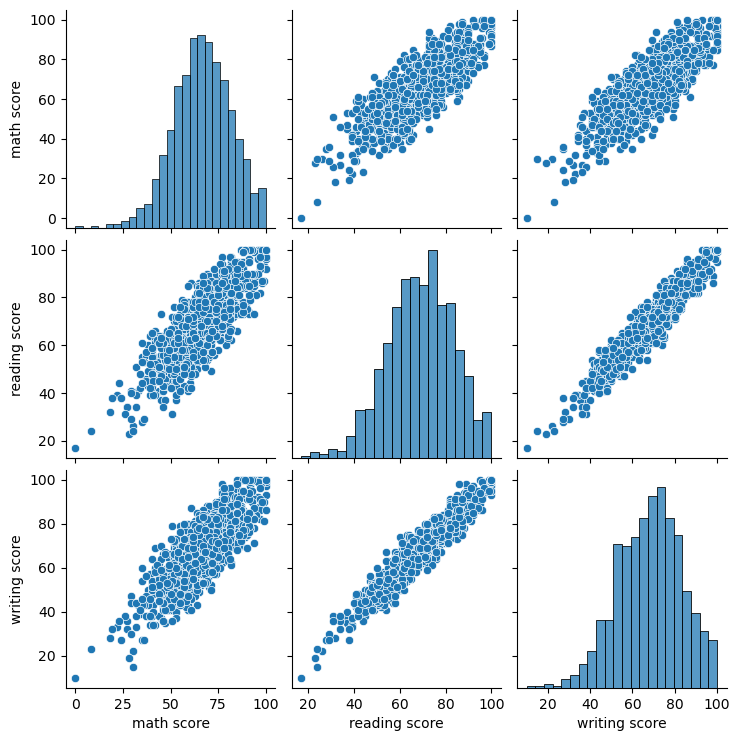

In [14]:
## 3. Basic EDA
print(df.describe())
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.show()

In [16]:
## 4. Feature Engineering (Input & Target)
# We'll predict 'math score' based on reading & writing scores.
X = df[['reading score', 'writing score']]  # Input Features
y = df['math score']  # Target (Label)

In [18]:
## 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.2,
                                                   random_state=42)

In [20]:
## 6. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
## 7. Predict & Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

MAE: 7.35 | RMSE: 8.79


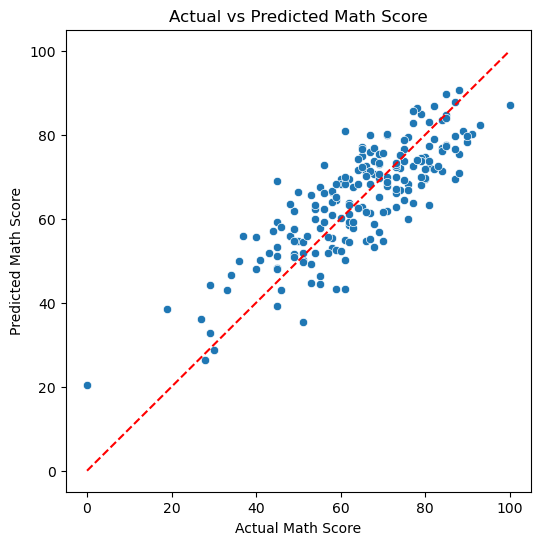

In [24]:
## Plot Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Score")
plt.show()

**Streamlit App Code:**

In [35]:
# === Streamlit App ===
st.title("🎓 Student Math Score Predictor")
st.write("Enter student's scores to predict Math score:")

reading = st.slider("Reading Score", 0, 100, 50)
writing = st.slider("Writing Score", 0, 100, 50)

input_df = pd.DataFrame({'reading score': [reading],
                         'writing score': [writing]})

if st.button("Predict Math Score"):
    pred = model.predict(input_df)[0]
    st.success(f"Predicted Math Score: {pred:.2f}")
